# Titanic - Machine Learning from Disaster

Question: What sorts of people were more likely to survive? (using passenger data: name, age gender, socio-economic class, etc.)

Goal: Predict if a passenger survived the sinking of the Titanic or not. For each person in the test set, you must predict a 0 or a 1 value for the variable.

Metric: Your score is the percentage of passengers you correctly predict. This is known as accuracy.

### Steps
1. View and Clean Data
2. Set up Sck-kit models
3. Set up Feed Forward NN in Pytorch model.
4. Train/Test Models
5. Compare Performance of Models.
6. Take best model and run it on test set


In [1]:
from data_pipeline import (
    clean_titanic_data,
    prepare_titanic_data,
    read_titanic_data,
)
from train_pipeline import Model

In [2]:
# Extract, prepare, and split data

path = "titanic/"
train_df = read_titanic_data(path, "train.csv")
test_df = read_titanic_data(path, "test.csv")

train_clean_df, encoded_labels = clean_titanic_data(train_df)
new_train_df, train_test_split = prepare_titanic_data(train_clean_df, 0.2, 42)

X_train, X_test, y_train, y_test = train_test_split

In [3]:
new_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.522376,1,0,-0.521028,2
1,1,1,0,0.579179,1,0,0.685138,0
2,1,3,0,-0.246988,0,0,-0.508313,2
3,1,1,0,0.372637,1,0,0.342628,2
4,0,3,1,0.372637,0,0,-0.505958,2
...,...,...,...,...,...,...,...,...
885,0,3,0,0.648026,0,5,-0.108978,1
886,0,2,1,-0.178140,0,0,-0.412718,2
887,1,1,0,-0.728918,0,0,-0.092496,2
889,1,1,1,-0.246988,0,0,-0.092496,0


## Logistic Regression

Model: LogisticRegression()

Model Accuracy: 83.688%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        85
           1       0.84      0.73      0.78        56

    accuracy                           0.84       141
   macro avg       0.84      0.82      0.83       141
weighted avg       0.84      0.84      0.83       141



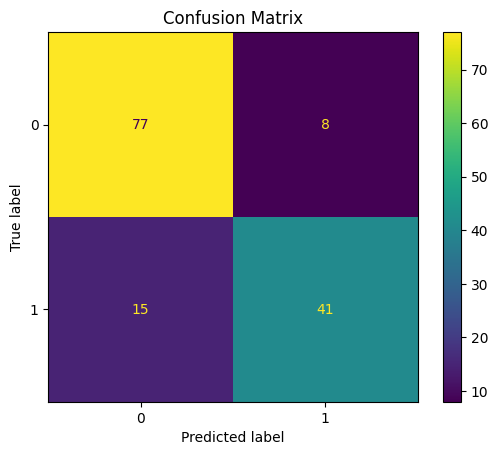

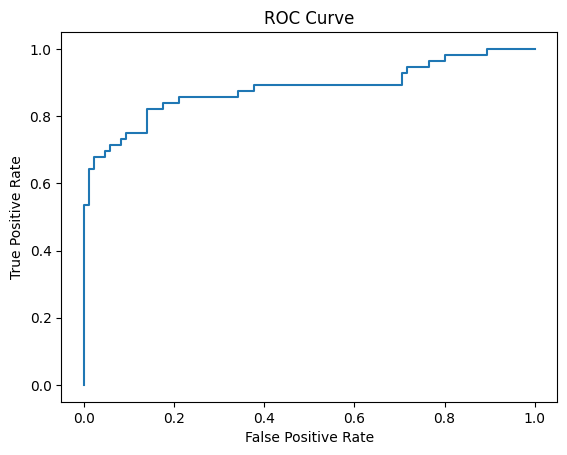

In [4]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = Model(LogisticRegression())
model, y_pred = log_reg.train(X_train, y_train, X_test)
(
    lr_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = log_reg.evaluate_model(X_test, y_test, y_pred)

log_reg.display_metrics(lr_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies = {}
model_accuracies["Logistic Regress"] = lr_accuracy

In [5]:
log_reg.save_model("trained_models/logistic_regression.pkl")

Saved model 'LogisticRegression' as trained_models/logistic_regression.pkl


## Decision Tree

Model: DecisionTreeClassifier()

Model Accuracy: 77.305%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        85
           1       0.76      0.62      0.69        56

    accuracy                           0.77       141
   macro avg       0.77      0.75      0.75       141
weighted avg       0.77      0.77      0.77       141



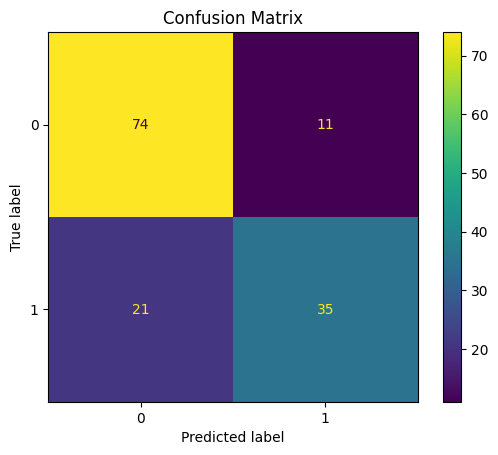

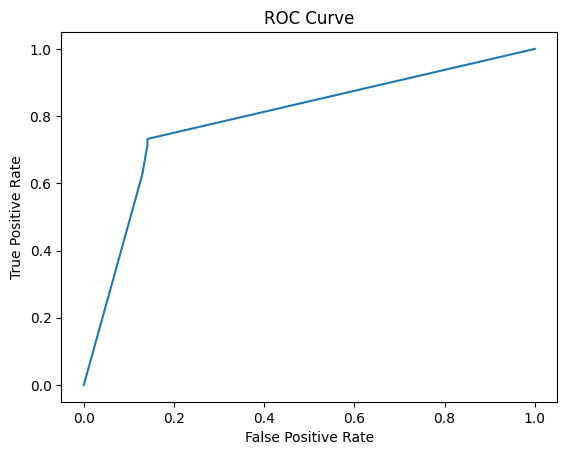

In [6]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = Model(DecisionTreeClassifier())
model, y_pred = decision_tree.train(X_train, y_train, X_test)
(
    dt_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = decision_tree.evaluate_model(X_test, y_test, y_pred)

decision_tree.display_metrics(dt_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Decision Tree"] = dt_accuracy

In [7]:
decision_tree.save_model("trained_models/decision_tree.pkl")

Saved model 'DecisionTreeClassifier' as trained_models/decision_tree.pkl


## Random Forest

Model: RandomForestClassifier()

Model Accuracy: 83.688%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        85
           1       0.87      0.70      0.77        56

    accuracy                           0.84       141
   macro avg       0.84      0.81      0.82       141
weighted avg       0.84      0.84      0.83       141



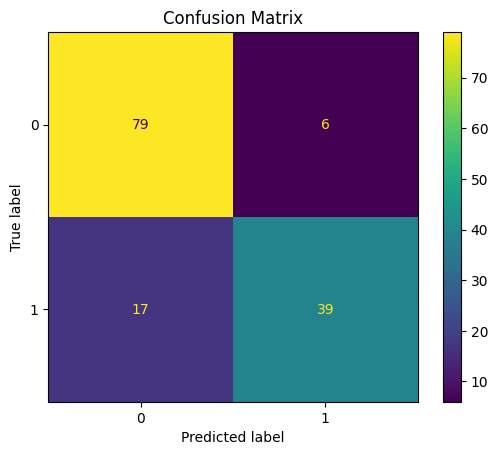

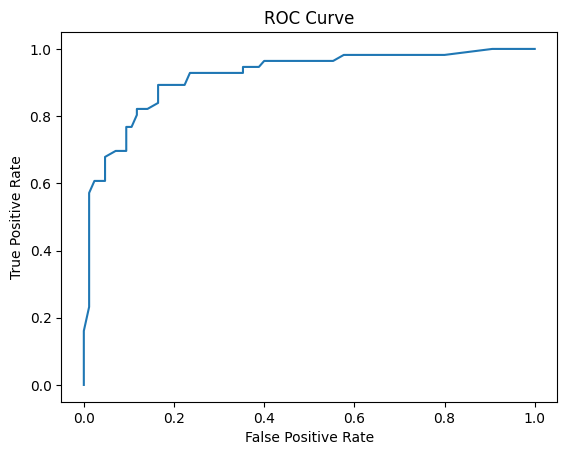

In [8]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = Model(RandomForestClassifier())

model, y_pred = random_forest.train(X_train, y_train, X_test)
(
    rf_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = random_forest.evaluate_model(X_test, y_test, y_pred)

random_forest.display_metrics(rf_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Random Forest"] = rf_accuracy

In [9]:
random_forest.save_model("trained_models/random_forest.pkl")

Saved model 'RandomForestClassifier' as trained_models/random_forest.pkl


## Support Vector Machine

Model: SVC(probability=True)

Model Accuracy: 87.943%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.87      0.82      0.84        56

    accuracy                           0.88       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.88      0.88       141



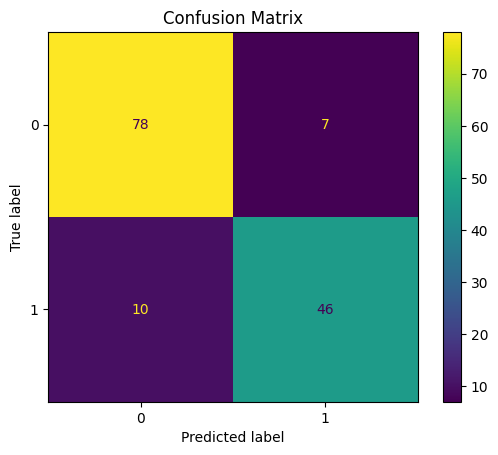

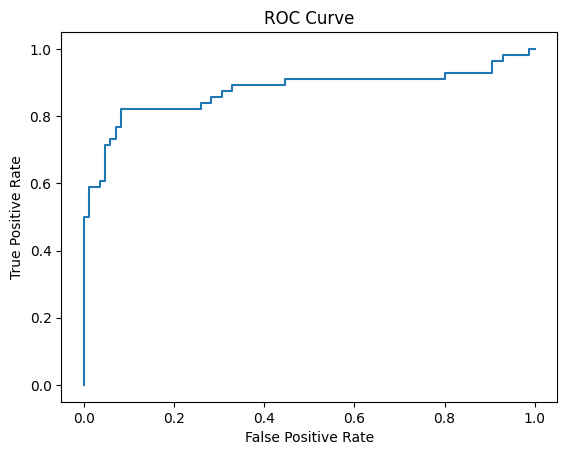

In [10]:
# Support Vector Machine

from sklearn.svm import SVC

svm = Model(SVC(probability=True))

model, y_pred = svm.train(X_train, y_train, X_test)
(
    svm_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = svm.evaluate_model(X_test, y_test, y_pred)

svm.display_metrics(svm_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["SVM"] = svm_accuracy

In [11]:
svm.save_model("trained_models/support_vector_machine.pkl")

Saved model 'SVC(probability=True)' as trained_models/support_vector_machine.pkl


## Gradient Boosting

Model: GradientBoostingClassifier()

Model Accuracy: 85.816%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        85
           1       0.93      0.70      0.80        56

    accuracy                           0.86       141
   macro avg       0.88      0.83      0.84       141
weighted avg       0.87      0.86      0.85       141



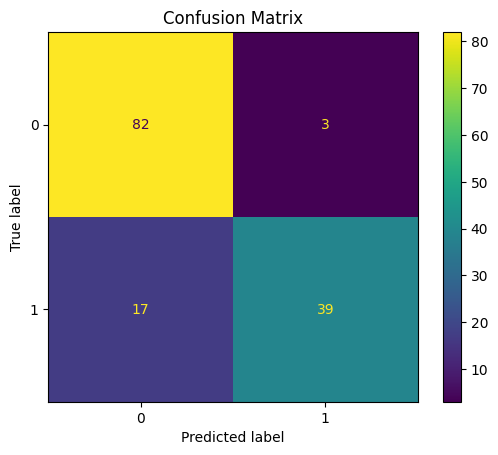

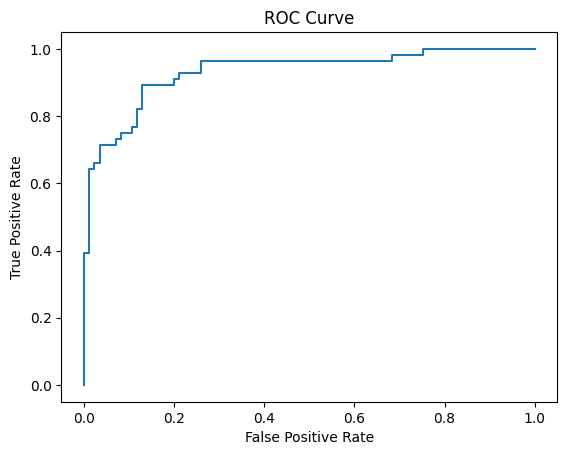

In [12]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = Model(GradientBoostingClassifier())

model, y_pred = gradient_boosting.train(X_train, y_train, X_test)
(
    gb_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = gradient_boosting.evaluate_model(X_test, y_test, y_pred)

gradient_boosting.display_metrics(gb_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Gradient Boosting"] = gb_accuracy

In [13]:
gradient_boosting.save_model("trained_models/gradient_boosting.pkl")

Saved model 'GradientBoostingClassifier' as trained_models/gradient_boosting.pkl


## Pytorch Model

In [14]:
from torch.utils.data import DataLoader

from train_neural_net import (
    CustomDataset,
    convert_df_to_tensor,
)

X_train_tensor = convert_df_to_tensor(X_train)
y_train_tensor = convert_df_to_tensor(y_train)

y_train_tensor = y_train_tensor.reshape(len(y_train_tensor), 1)

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = convert_df_to_tensor(X_test)
y_test_tensor = convert_df_to_tensor(y_test)

y_test_tensor = y_test_tensor.reshape(len(y_test_tensor), 1)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [15]:
from train_neural_net import save_model, train_pytorch_model

best_values, loss_lists, eval_outputs = train_pytorch_model(
    train_dataloader, test_dataloader, num_epochs=100
)

pytorch_model, best_epoch, best_avg_loss = best_values
train_list, val_list = loss_lists
targets, predictions, probabilities = eval_outputs

print(f"Best Model loss: {best_avg_loss}")

Epoch 1
Train Loss: 0.6578379703892602
Val Loss: 0.6194375157356262

Epoch 2
Train Loss: 0.5759028146664301
Val Loss: 0.536058783531189

Epoch 3
Train Loss: 0.517519035273128
Val Loss: 0.42721813917160034

Epoch 4
Train Loss: 0.47646768059995437
Val Loss: 0.4140883982181549

Epoch 5
Train Loss: 0.450184639957216
Val Loss: 0.37260007858276367

Epoch 6
Train Loss: 0.4688299165831672
Val Loss: 0.4130304753780365

Epoch 7
Train Loss: 0.4517023695839776
Val Loss: 0.38968735933303833

Epoch 8
Train Loss: 0.427372266848882
Val Loss: 0.3694165050983429

Epoch 9
Train Loss: 0.4055737356344859
Val Loss: 0.3560348451137543

Epoch 10
Train Loss: 0.41071155336168075
Val Loss: 0.347073495388031

Epoch 11
Train Loss: 0.4050130579206679
Val Loss: 0.3614599406719208

Epoch 12
Train Loss: 0.40350112815697986
Val Loss: 0.37632569670677185

Epoch 13
Train Loss: 0.39580515523751575
Val Loss: 0.3694365322589874

Epoch 14
Train Loss: 0.4019870294464959
Val Loss: 0.4188130795955658

Epoch 15
Train Loss: 0.388

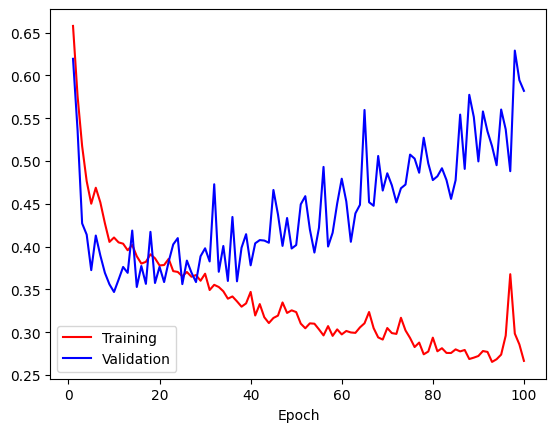

In [16]:
import matplotlib.pyplot as plt

epochs = [*range(1, 101)]

plt.plot(epochs, train_list, label="Training", color="red")
plt.plot(epochs, val_list, label="Validation", color="blue")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [17]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_model(pytorch_model, best_epoch, timestamp)

In [18]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

targets_df = pd.DataFrame(targets)
predictions_df = pd.DataFrame(predictions)

dl_accuracy = accuracy_score(targets_df, predictions_df)
precision = precision_score(targets_df, predictions_df)
recall = recall_score(targets_df, predictions_df)
f1 = f1_score(targets_df, predictions_df)

cnf_matrix = confusion_matrix(targets_df, predictions_df)

class_report = classification_report(targets_df, predictions_df)

model_accuracies["Deep Learning"] = dl_accuracy

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(targets, probabilities)

Accuracy: 0.87943

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        85
         1.0       0.90      0.79      0.84        56

    accuracy                           0.88       141
   macro avg       0.88      0.86      0.87       141
weighted avg       0.88      0.88      0.88       141



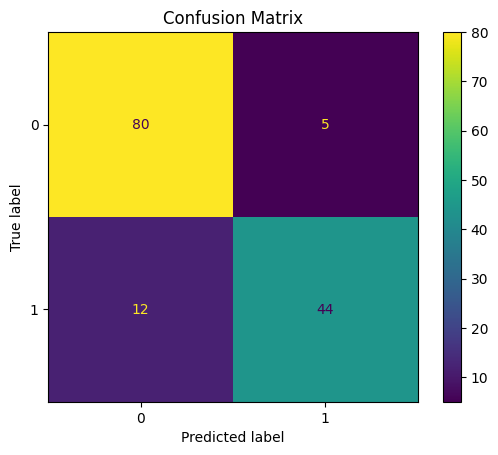

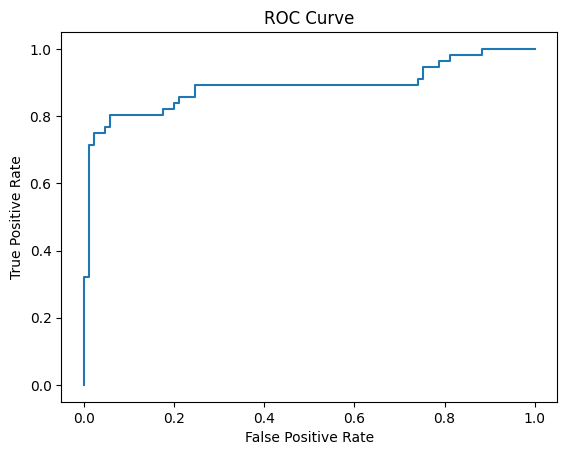

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Accuracy: {dl_accuracy:.5f}")

print("\nClassification Report:")
print(class_report)

ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# Display ROC Curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Performance Comparison

In [21]:
print(model_accuracies)

{'Logistic Regress': 0.8368794326241135, 'Decision Tree': 0.7730496453900709, 'Random Forest': 0.8368794326241135, 'SVM': 0.8794326241134752, 'Gradient Boosting': 0.8581560283687943, 'Deep Learning': 0.8794326241134752}


Text(0, 0.5, 'Accuracy')

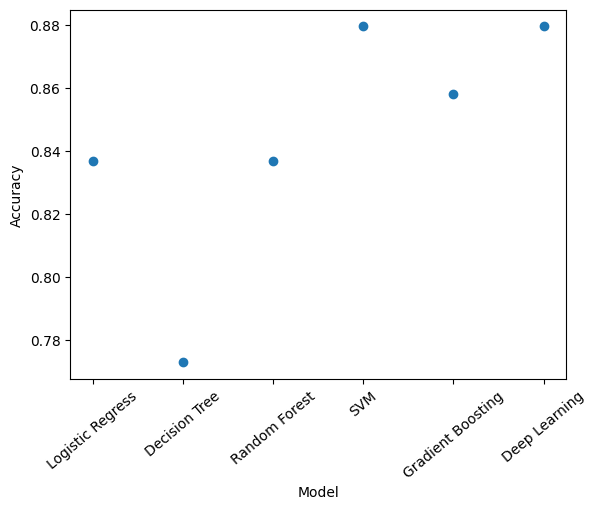

In [22]:
plt.scatter(model_accuracies.keys(), model_accuracies.values())
plt.xlabel("Model")
plt.xticks(rotation=40)
plt.ylabel("Accuracy")

## Summary

Top models are:
SVM and Deep Learning

**The SVM model appears to be the best-performing model overall, as its precision, recall, and F1 score are more balanced compared to the others.** The deep learning model was trained with minimal tuning and poor parameter settings, so it has significant room for improvement and could potentially achieve accuracies in the high 90s with further optimization. However, if high accuracy isn’t the main priority, the SVM model offers an excellent balance between simplicity and performance. It’s easy to set up and delivers results comparable to the deep learning model, especially with some additional tuning. Therefore, the SVM is likely the best-suited model for this task. While the deep learning approach could eventually outperform it, the small potential gain in accuracy may not justify the extra complexity and effort required.

# Next Steps / Improvements

Take test set, clean it, load svm model, predict surviors for test set data